# Aula Assincrona 02

**Nome:** Luan Carlos Martins dos Santos, 23022464

In [1]:
# Importar as Bibliotecas
from os import getcwd, sep
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings

In [2]:
# Comando para ignorar as mensagens de avisos
warnings.filterwarnings('ignore')

1. Exiba a Matriz de Correlação entre as variáveis

In [3]:
# Ler o dataset
df = pd.read_csv(getcwd()+sep+"FuelConsumptionCo2.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [4]:
# verificar o tipo das variáveis
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [5]:
# Verificar se há valores faltantes
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [6]:
# Calcular e exibir a matriz de correlação entre os dados
correlacao = df.iloc[:, 1:].corr(method ='pearson')
correlacao

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


2. Atualize os nomes das seguintes colunas:

- 2.1. FUELCONSUMPTION_CITY = FUELCONSCITY
- 2.2. FUELCONSUMPTION_HWY = FUELCONSHWY
- 2.3. FUELCONSUMPTION_COMB = FUELCONSCOMB
- 2.4. FUELCONSUMPTION_COMB_MPG = FUELCONSCOMBMPG

In [7]:
# Renomear as colunas, conforme foi solicitado
df = df.rename(columns={'FUELCONSUMPTION_CITY': 'FUELCONSCITY'})
df = df.rename(columns={'FUELCONSUMPTION_HWY': 'FUELCONSHWY'})
df = df.rename(columns={'FUELCONSUMPTION_COMB': 'FUELCONSCOMB'})
df = df.rename(columns={'FUELCONSUMPTION_COMB_MPG': 'FUELCONSCOMBMPG'})
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSCITY,FUELCONSHWY,FUELCONSCOMB,FUELCONSCOMBMPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


3. Crie um novo dataframe com as seguintes colunas:

'ENGINESIZE','CYLINDERS','FUELCONSCOMB','CO2EMISSIONS'

In [8]:
# Criar o novo dataset, conforme foi solicitado
new_df = df[['ENGINESIZE','CYLINDERS','FUELCONSCOMB','CO2EMISSIONS']]
new_df

,ENGINESIZE,CYLINDERS,FUELCONSCOMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


4. Faça as seguintes análises:

- 4.1. Separe os dados de treino e teste
- 4.2. Import sklearn library
- 4.3. Crie a variável com o modelo de Regressão Linear
- 4.4. Separe os dados de treino e teste <code style="color:red">(Item desconsiderado por sugestão do professor)</code>

In [9]:
#Separar em dados de treino e teste: até 70% para treino, e o restante para teste
aux = np.random.rand(len(df)) <= 0.70
new_dfTrain = new_df[aux]
new_dfTest = new_df[~aux]

# Exibir o tamnanho da amostra de teste e de treino
print('Dados de Treino = ', new_dfTrain.shape)
print('Dados de Teste   = ', new_dfTest.shape)

Dados de Treino =  (742, 4)
Dados de Teste   =  (325, 4)


In [10]:
# Importrar a biblioteca Sklearn
from sklearn import linear_model

In [11]:
# Criar modelo de Regressão Linear
reg = linear_model.LinearRegression()

- 4.5. Separe as Features de Treino e Teste
- 4.6. Rode o Modelo
- 4.7. Defina os valores para os coeficientes Theta 0: Intercepto e Theta 1: Coeficiente
- 4.7. Plot o Gráfico de Regressão Linear com a Reta Ajustada
- 4.8. Encontre o R2-Score

In [12]:
# Separar as Feature de Treino
X_train = new_dfTrain[['ENGINESIZE']]
Y_train = new_dfTrain[['CO2EMISSIONS']]

# Separar as Feature de Teste
X_test = new_dfTest[['ENGINESIZE']]
Y_test = new_dfTest[['CO2EMISSIONS']]

# Treinamento do modelo de Regressão Linear
reg.fit(X_train, Y_train)

LinearRegression()

In [13]:
# Obtenção do coeficiente e intercepto
a = reg.intercept_[0]
b = reg.coef_[0,0]

# Exibição do coeficiente e intercepto
print ('Coeficiente: ', b)
print ('Intercepto: ', a)

# Exibição da equação da reta
print("\nY = {:.2f} + {:.2f}*ENGINESIZE".format(a, b))

Coeficiente:  39.541774218153144
Intercepto:  124.16368072848556

Y = 124.16 + 39.54*ENGINESIZE


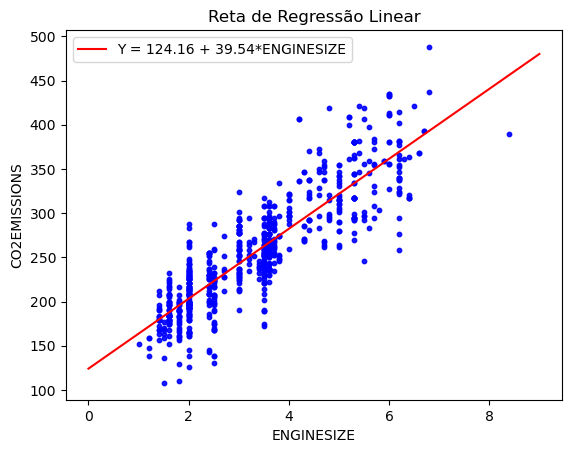

In [14]:
# Plotar a reta de Regressão Linear no mesmo plano da distribuição dos dados
plt.scatter(y=Y_train, x=X_train, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(0, 9)
plt.plot(X_plot, a + X_plot*b, color='r', label="Y = {:.2f} + {:.2f}*ENGINESIZE".format(a, b))
plt.title('Reta de Regressão Linear')
plt.ylabel('CO2EMISSIONS')
plt.xlabel('ENGINESIZE')
plt.legend()
plt.show()

In [15]:
# importar a biblioteca necessária para obter o R2 score
from sklearn.metrics import r2_score

# Realizar previsões com o modelo de Regressão Linear
Y_test_ = reg.predict(X_test)

# Cálculo e exibição do R2-Score
print("R2-score: %.2f" % r2_score(Y_test , Y_test_) )

R2-score: 0.78


- 4.5. Separe as Features de Treino e Teste
- 4.6. Rode o Modelo
- 4.7. Defina os valores para os coeficientes Theta 0: Intercepto e Theta 1: Coeficiente
- 4.7. Plot o Gráfico de Regressão Linear com a Reta Ajustada
- 4.8. Encontre o R2-Score

In [16]:
# Separar as Feature de Treino
X_train = new_dfTrain[['CYLINDERS']]
Y_train = new_dfTrain[['CO2EMISSIONS']]

# Separar as Feature de Teste
X_test = new_dfTest[['CYLINDERS']]
Y_test = new_dfTest[['CO2EMISSIONS']]

# Treinamento do modelo de Regressão Linear
reg.fit(X_train, Y_train)

LinearRegression()

In [17]:
# Obtenção do coeficiente e intercepto
a = reg.intercept_[0]
b = reg.coef_[0,0]

# Exibição do coeficiente e intercepto
print ('Coeficiente: ', b)
print ('Intercepto: ', a)

# Exibição da equação da reta
print("\nY = {:.2f} + {:.2f}*CYLINDERS".format(a, b))

Coeficiente:  30.489294545495838
Intercepto:  79.84006745381717

Y = 79.84 + 30.49*CYLINDERS


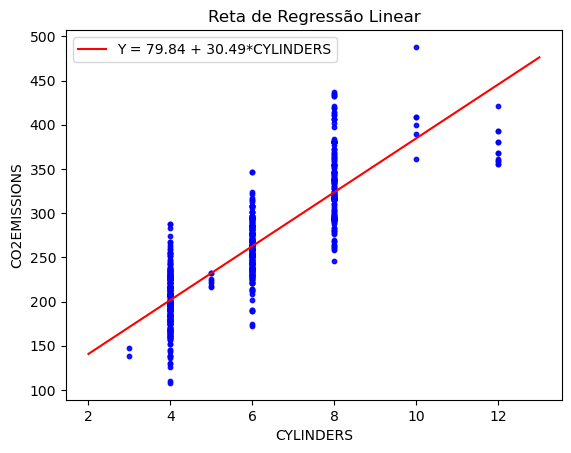

In [18]:
# Plotar a reta de Regressão Linear no mesmo plano da distribuição dos dados
plt.scatter(y=Y_train, x=X_train, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(2, 13)
plt.plot(X_plot, a + X_plot*b, color='r', label="Y = {:.2f} + {:.2f}*CYLINDERS".format(a, b))
plt.title('Reta de Regressão Linear')
plt.ylabel('CO2EMISSIONS')
plt.xlabel('CYLINDERS')
plt.legend()
plt.show()

In [19]:
# Realizar previsões com o modelo de Regressão Linear
Y_test_ = reg.predict(X_test)

# Cálculo e exibição do R2-Score
print("R2-score: %.2f" % r2_score(Y_test , Y_test_) )

R2-score: 0.73


- 4.5. Separe as Features de Treino e Teste
- 4.6. Rode o Modelo
- 4.7. Defina os valores para os coeficientes Theta 0: Intercepto e Theta 1: Coeficiente
- 4.7. Plot o Gráfico de Regressão Linear com a Reta Ajustada
- 4.8. Encontre o R2-Score

In [20]:
# Separar as Feature de Treino
X_train = new_dfTrain[['FUELCONSCOMB']]
Y_train = new_dfTrain[['CO2EMISSIONS']]

# Separar as Feature de Teste
X_test = new_dfTest[['FUELCONSCOMB']]
Y_test = new_dfTest[['CO2EMISSIONS']]

# Treinamento do modelo de Regressão Linear
reg.fit(X_train, Y_train)

LinearRegression()

In [21]:
# Obtenção do coeficiente e intercepto
a = reg.intercept_[0]
b = reg.coef_[0,0]

# Exibição do coeficiente e intercepto
print ('Coeficiente: ', b)
print ('Intercepto: ', a)

# Exibição da equação da reta
print("\nY = {:.2f} + {:.2f}*FUELCONSCOMB".format(a, b))

Coeficiente:  16.28112926846267
Intercepto:  67.31829419696766

Y = 67.32 + 16.28*FUELCONSCOMB


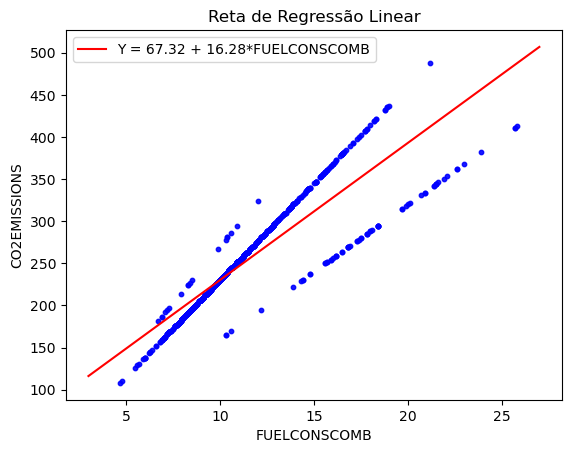

In [22]:
# Plotar a reta de Regressão Linear no mesmo plano da distribuição dos dados
plt.scatter(y=Y_train, x=X_train, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(3, 27)
plt.plot(X_plot, a + X_plot*b, color='r', label="Y = {:.2f} + {:.2f}*FUELCONSCOMB".format(a, b))
plt.title('Reta de Regressão Linear')
plt.ylabel('CO2EMISSIONS')
plt.xlabel('FUELCONSCOMB')
plt.legend()
plt.show()

In [23]:
# Realizar previsões com o modelo de Regressão Linear
Y_test_ = reg.predict(X_test)

# Cálculo e exibição do R2-Score
print("R2-score: %.2f" % r2_score(Y_test , Y_test_) )

R2-score: 0.80


5. Encontre o Melhor ajuste (R2-Score) entre as combinações de variáveis abaixo:

- 5.1.  FUELCONSCOMB & CO2EMISSIONS <code style="color:red">(Encontrado anteriormente)</code>

- 5.2. CYLINDERS & CO2EMISSIONS <code style="color:red">(Encontrado anteriormente)</code>

- 5.3. ENGINESIZE & CO2EMISSIONS <code style="color:red">(Encontrado anteriormente)</code>

6. Tente realizar uma Regressão Linear Múltipla. Use as três variáveis

- ENGINESIZE

- CYLINDERS

- FUELCONSCOMB

In [24]:
# Separar as Feature de Treino
X_train = new_dfTrain[['ENGINESIZE','CYLINDERS','FUELCONSCOMB']]
Y_train = new_dfTrain[['CO2EMISSIONS']]

# Separar as Feature de Teste
X_test = new_dfTest[['ENGINESIZE','CYLINDERS','FUELCONSCOMB']]
Y_test = new_dfTest[['CO2EMISSIONS']]

# Treinamento do modelo de Regressão Linear
reg.fit(X_train, Y_train)

# Obtenção dos coeficientes e intercepto
a = reg.intercept_[0]
b0 = reg.coef_[0,0]
b1 = reg.coef_[0,1]
b2 = reg.coef_[0,2]

# Exibição dos coeficientes e intercepto
print ('Coeficiente 0: ', b0)
print ('Coeficiente 1: ', b1)
print ('Coeficiente 2: ', b2)
print ('Intercepto: ', a)

# Exibição da equação da reta
print("\nY = {:.2f} + {:.2f}*ENGINESIZE + {:.2f}*CYLINDERS + {:.2f}*FUELCONSCOMB".format(a, b0, b1, b2))

Coeficiente 0:  10.876858632260875
Coeficiente 1:  7.528651749158273
Coeficiente 2:  9.76058541818426
Intercepto:  63.151885700641174

Y = 63.15 + 10.88*ENGINESIZE + 7.53*CYLINDERS + 9.76*FUELCONSCOMB


In [25]:
# Realizar previsões com o modelo de Regressão Linear
Y_test_ = reg.predict(X_test)

# Cálculo e exibição do R2-Score
print("R2-score: %.2f" % r2_score(Y_test , Y_test_) )

R2-score: 0.87
